In [29]:
%reload_ext autoreload
%autoreload 2
import tensorflow as tf
import sys
import math
import numpy as np
sys.path.append('../../pytools')
import d2l
import collections
import re
import random
d2l.gpu_mem_init()

Memory growth enabled for PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'): True


In [30]:
batch_size, num_steps, num_hiddens, lr, num_epochs = 32, 35, 256, 2.0, 500
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

困惑度 17.2, 835.3 词元/秒 /GPU:0
time traveller                                                   
traveller                                                   


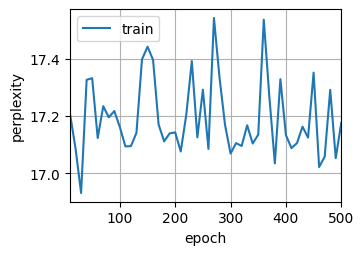

In [31]:
lstm_cell = tf.keras.layers.LSTMCell(num_hiddens)
lstm_layer = tf.keras.layers.RNN(lstm_cell, return_sequences=True, return_state=True)
device_name = d2l.try_gpu()._device_name
strategy = tf.distribute.OneDeviceStrategy(device_name)
with strategy.scope():
    model = d2l.RNNModel(lstm_layer, vocab_size=len(vocab))
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, strategy)